To figure out the best neightborhood in Pittsburgh, we must find which one is the most dog friendly. One of the three databases to help find this is look for which neighborhood has the **most occupied units of houses**. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

houses_pandas = pd.read_csv("PittsburghHouses.tsv" , sep='\t')

After importing the houses in Pittsburgh neighborhood data, I displayed the information in a table to get an idea of what the data entails. The following table includes 5 randomly selected neighborhoods with their set of data. 

In [3]:
houses_pandas.sample(5)

,Neighborhood,Sector #,Population (2010),Total # Units (2000),Total # Units (2010),% Occupied Units (2010),% Vacant Units (2010),# Occupied Units (2010),% Owner Occupied Units (2010),% Renter Occupied Units (2010),...,% Units Built before 1939,Median Home Value (2000),Med. Val. ('00 in '10 Dollars),Median Home Value (2010),% Change Real Value 2000-2010,Median Sale Price (2010),# Sales Counted (2010),Foreclosures (2008),Foreclosures (2010),% of all Housing Units Foreclosed (2010)
57,Northview Heights,1,1214,879,723,0.636238,0.363762,527,0.000000,1.000000,...,0.210526,29400.0,37229.236994,NaN,NaN,30902.5,2,0,1,0.001383
17,Central Lawrenceville,13,4482,2904,2670,0.858801,0.141199,2388,0.491625,0.508375,...,0.763509,41950.0,53121.309249,66850.0,0.258440,67500.0,107,11,11,0.004120
0,Allegheny Center,3,933,675,1052,0.515209,0.484791,535,0.100935,0.899065,...,0.012821,86500.0,109535.000000,136300.0,0.244351,NaN,0,0,0,0.000000
43,Knoxville,6,3747,1923,1857,0.786214,0.213786,1453,0.657949,0.342051,...,0.737226,36000.0,45586.820809,39900.0,-0.124747,10633.5,50,36,19,0.010232
33,Friendship,12,1785,1180,1163,0.920894,0.079106,1012,0.139328,0.860672,...,0.628237,115600.0,146384.346821,167300.0,0.142882,197950.0,18,3,5,0.004299


To use this data in finding which is the most dog friendly neighborhood, we look at which area has the most occupied houses. To do so, we will look at the "# Occupied Units (2010)" column.

But first, let's do data visualization to get a better sense of it. I decided that a **bar graph** would best represent this type of data. The graph represents the total number of occupied units in 2010 in each Pittsburgh neighborhood. 

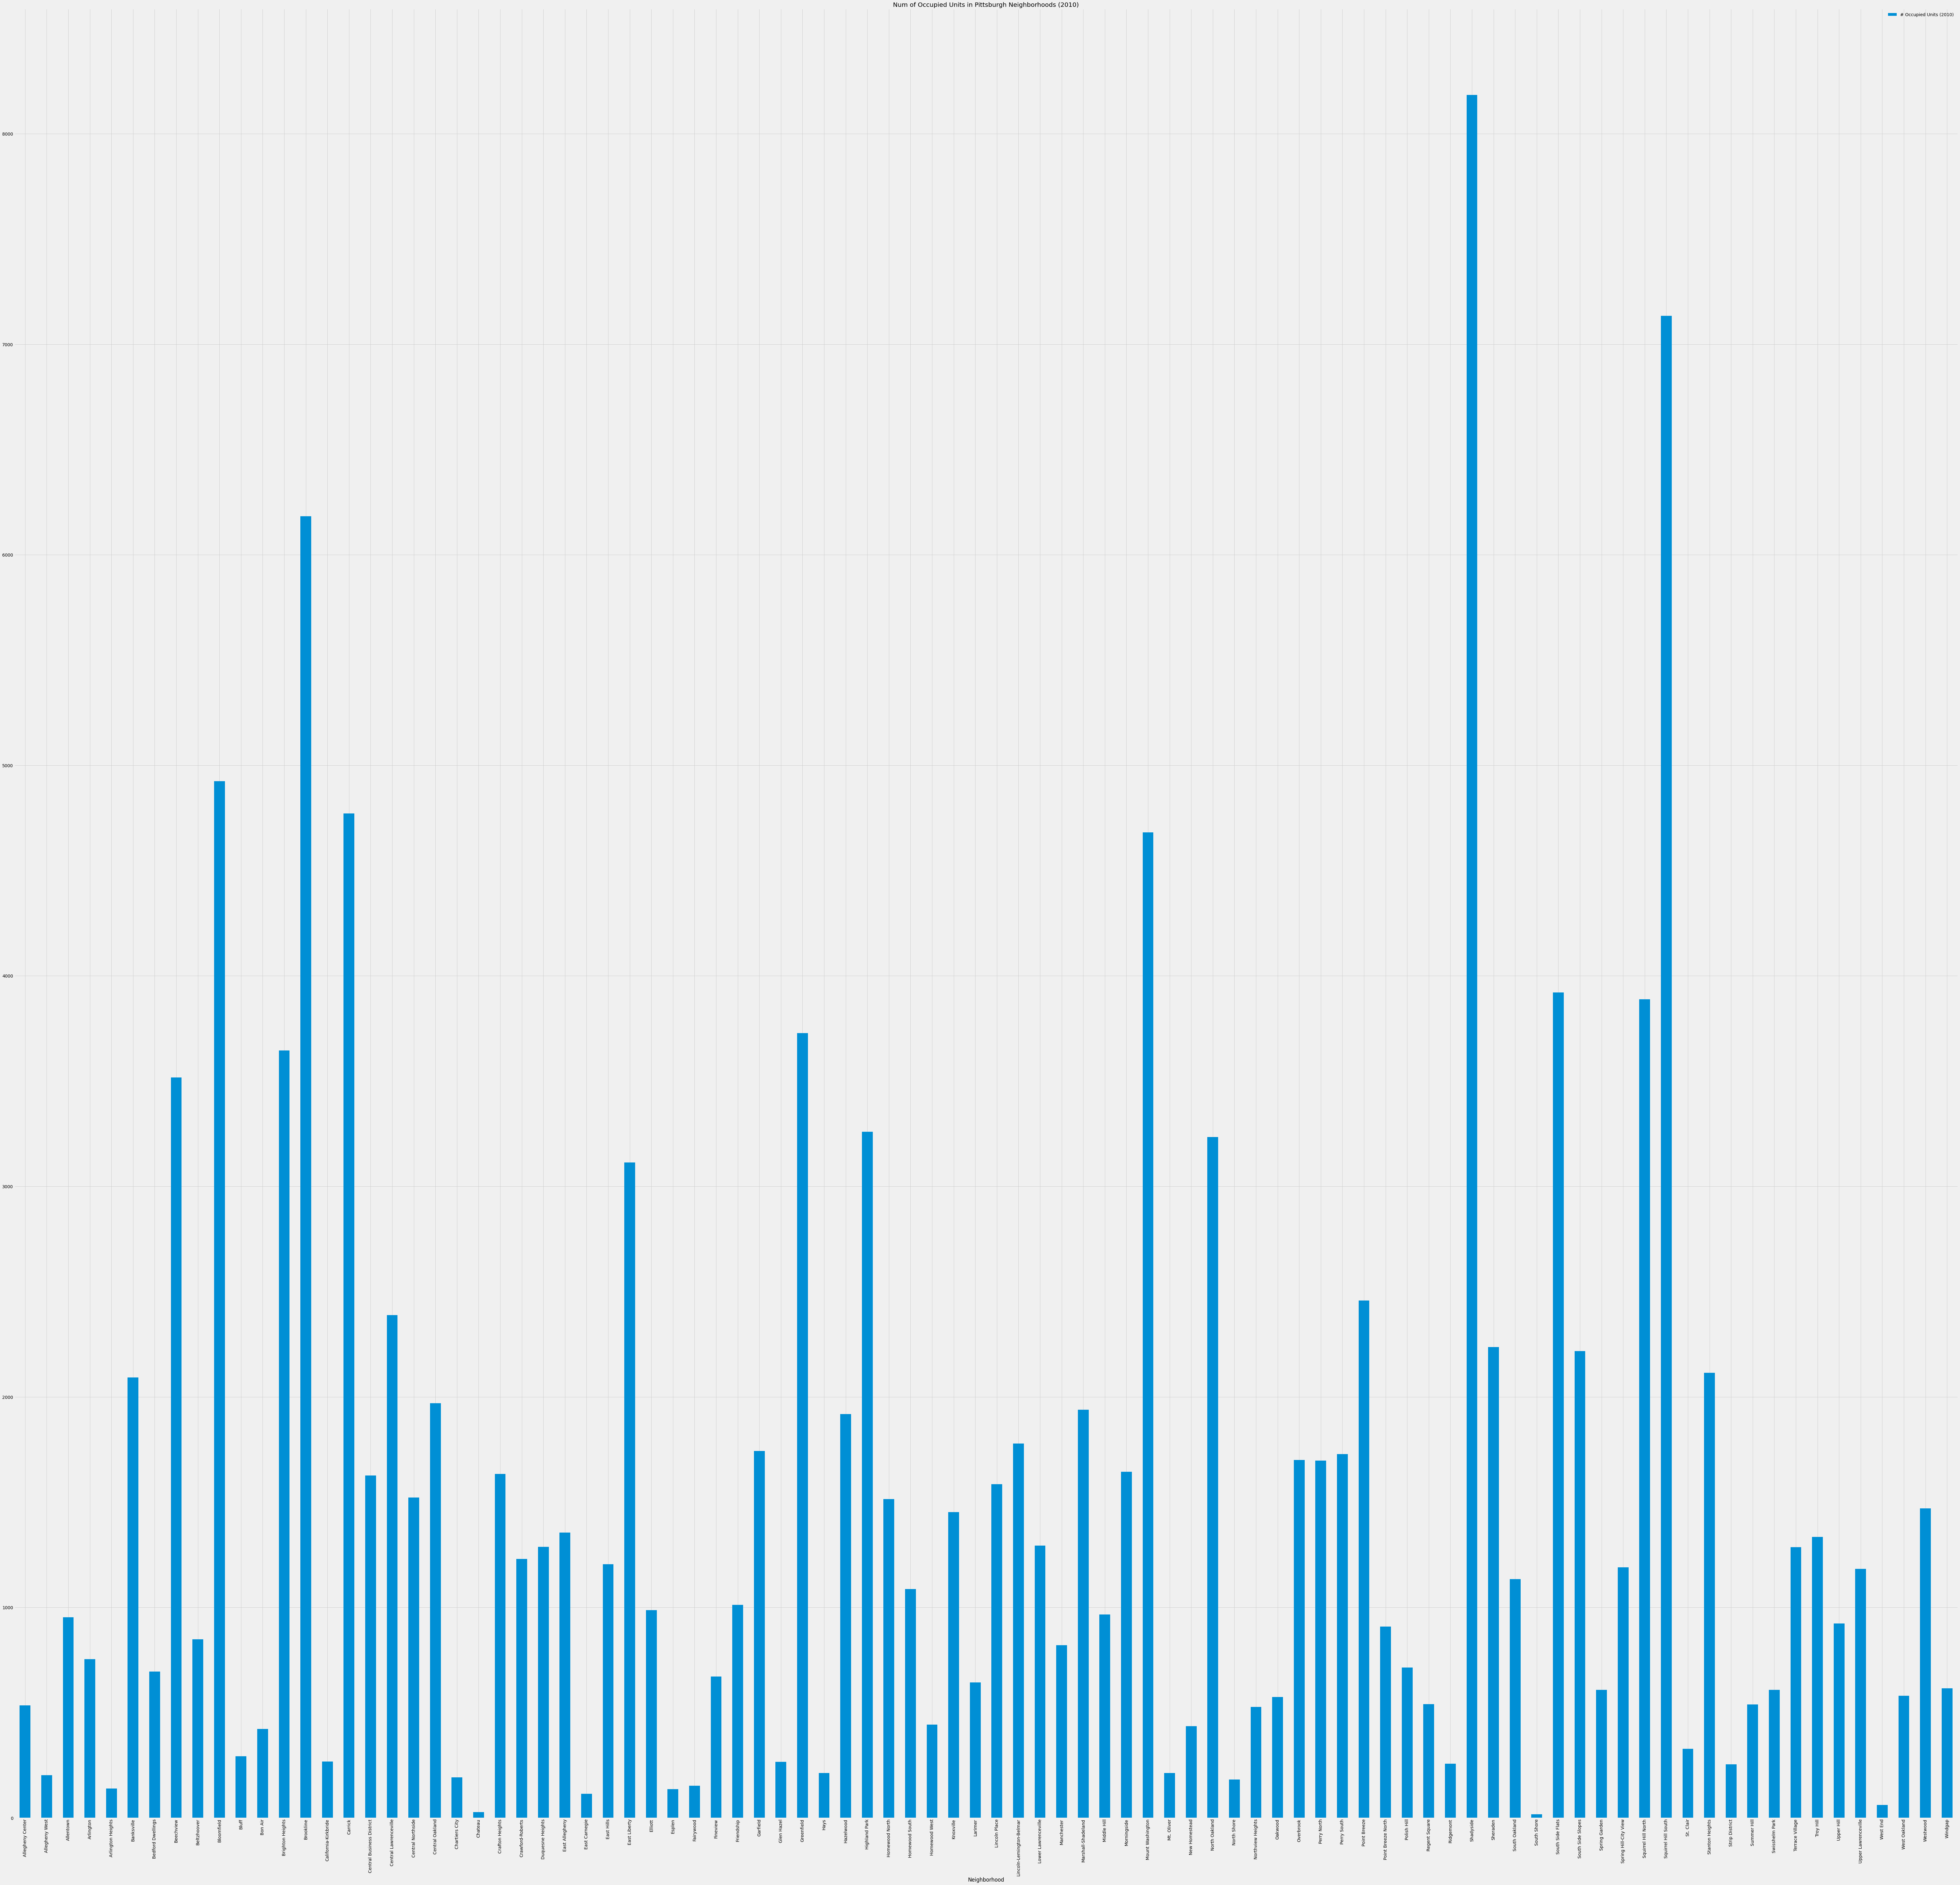

In [34]:
plt.style.use('fivethirtyeight')
houses_pandas.plot(kind='bar', x='Neighborhood', 
                    y='# Occupied Units (2010)', 
                    title='Num of Occupied Units in Pittsburgh Neighborhoods (2010)',
                    figsize=(100,100))

Creating a new dataframe where we only see data in the "Neighborhood" and "# Occupied Units (2010)"

Reorder the data to show the least number of occupied units in each neighborhood

In [5]:
occupied_units = houses_pandas.groupby("Neighborhood").sum()['# Occupied Units (2010)']
ordered_units = occupied_units.sort_values(ascending=True)

Let's look at the first 40 of occupied units

In [6]:
ordered_units.head(40)

Neighborhood
South Shore              18
Chateau                  28
West End                 62
East Carnegie           114
Esplen                  137
Arlington Heights       139
Fairywood               153
North Shore             183
Chartiers City          193
Allegheny West          203
Mt. Oliver              213
Hays                    214
Strip District          254
Ridgemont               257
Glen Hazel              266
California-Kirkbride    268
Bluff                   293
St. Clair               328
Bon Air                 423
New Homestead           436
Homewood West           444
Northview Heights       527
Allegheny Center        535
Summer Hill             539
Regent Square           540
Oakwood                 575
West Oakland            580
Spring Garden           608
Swisshelm Park          608
Windgap                 615
Larimer                 644
Fineview                672
Bedford Dwellings       695
Polish Hill             715
Arlington               754
Manches

Remove first 30 neighborhoods with the least units because a place too vast will not have enough resources for a dog 

In [7]:
filter_data_least = ordered_units.iloc[31:]

Let's look at the first 10 data after we filtered out the first 30

In [8]:
filter_data_least.head(10)

Neighborhood
Fineview              672
Bedford Dwellings     695
Polish Hill           715
Arlington             754
Manchester            821
Beltzhoover           849
Point Breeze North    909
Upper Hill            924
Allentown             953
Middle Hill           967
Name: # Occupied Units (2010), dtype: int64

We can check that it cut off at 30, and started from 31, by using Pandas iloc

In [9]:
ordered_units.iloc[31]

672

We can see that it is correct because iloc shows us that the 31st neighborhood has 672 occupied units which our filtered data shows

Now, let's reorder the data to show the most number of occupied units in each neighborhood

In [10]:
reordered_units = filter_data_least.sort_values(ascending=False)

Let's look at the first 40 of occupied units in our reordered data

In [11]:
reordered_units.head(40)

Neighborhood
Shadyside                    8185
Squirrel Hill South          7135
Brookline                    6183
Bloomfield                   4924
Carrick                      4772
Mount Washington             4681
South Side Flats             3921
Squirrel Hill North          3889
Greenfield                   3728
Brighton Heights             3645
Beechview                    3518
Highland Park                3259
North Oakland                3234
East Liberty                 3114
Point Breeze                 2458
Central Lawrenceville        2388
Sheraden                     2237
South Side Slopes            2218
Stanton Heights              2115
Banksville                   2093
Central Oakland              1970
Marshall-Shadeland           1939
Hazelwood                    1919
Lincoln-Lemington-Belmar     1778
Garfield                     1743
Perry South                  1728
Overbrook                    1700
Perry North                  1698
Morningside                  1645
C

Remove first 30 neighborhoods with the most units because places too crowded are not the best for dogs (ex. limited space)

In [12]:
filter_data_most = reordered_units.iloc[31:]

Let's look at the first 10 data after we filtered out the first 30

In [13]:
filter_data_most.head(10)

Neighborhood
Lincoln Place          1586
Central Northside      1522
Homewood North         1515
Westwood               1470
Knoxville              1453
East Allegheny         1355
Troy Hill              1335
Lower Lawrenceville    1294
Duquesne Heights       1287
Terrace Village        1286
Name: # Occupied Units (2010), dtype: int64

Similar to the previous dataset, we can check that it did in fact drop the first 30 by using iloc

In [14]:
reordered_units.iloc[31]

1586

We can see that it is correct because iloc shows us that the 31st neighborhood has 1586 occupied units which our filtered data shows

Let's print out our finalized filtered data

In [15]:
print(filter_data_most)

Neighborhood
Lincoln Place            1586
Central Northside        1522
Homewood North           1515
Westwood                 1470
Knoxville                1453
East Allegheny           1355
Troy Hill                1335
Lower Lawrenceville      1294
Duquesne Heights         1287
Terrace Village          1286
Crawford-Roberts         1230
East Hills               1205
Spring Hill-City View    1191
Upper Lawrenceville      1183
South Oakland            1134
Homewood South           1087
Friendship               1012
Elliott                   987
Middle Hill               967
Allentown                 953
Upper Hill                924
Point Breeze North        909
Beltzhoover               849
Manchester                821
Arlington                 754
Polish Hill               715
Bedford Dwellings         695
Fineview                  672
Name: # Occupied Units (2010), dtype: int64


Now that we have our data filtered to our satisfaction, we will use it to identify which neighborhood is best according to number of occupied units.

To rank each neighborhood by house we will divide the number of occupied units in each neighborhood by the neighborhood that has the most. To find this, we will use iloc[1]

In [18]:
filter_data_most.iloc[0]

1586

In [22]:
rank = filter_data_most / 1586
print(rank)

Neighborhood
Lincoln Place            1.000000
Central Northside        0.959647
Homewood North           0.955233
Westwood                 0.926860
Knoxville                0.916141
East Allegheny           0.854351
Troy Hill                0.841740
Lower Lawrenceville      0.815889
Duquesne Heights         0.811475
Terrace Village          0.810845
Crawford-Roberts         0.775536
East Hills               0.759773
Spring Hill-City View    0.750946
Upper Lawrenceville      0.745902
South Oakland            0.715006
Homewood South           0.685372
Friendship               0.638083
Elliott                  0.622320
Middle Hill              0.609710
Allentown                0.600883
Upper Hill               0.582598
Point Breeze North       0.573140
Beltzhoover              0.535309
Manchester               0.517654
Arlington                0.475410
Polish Hill              0.450820
Bedford Dwellings        0.438209
Fineview                 0.423707
Name: # Occupied Units (2010), dtyp

Create a bar graph to better visualize the ranking data

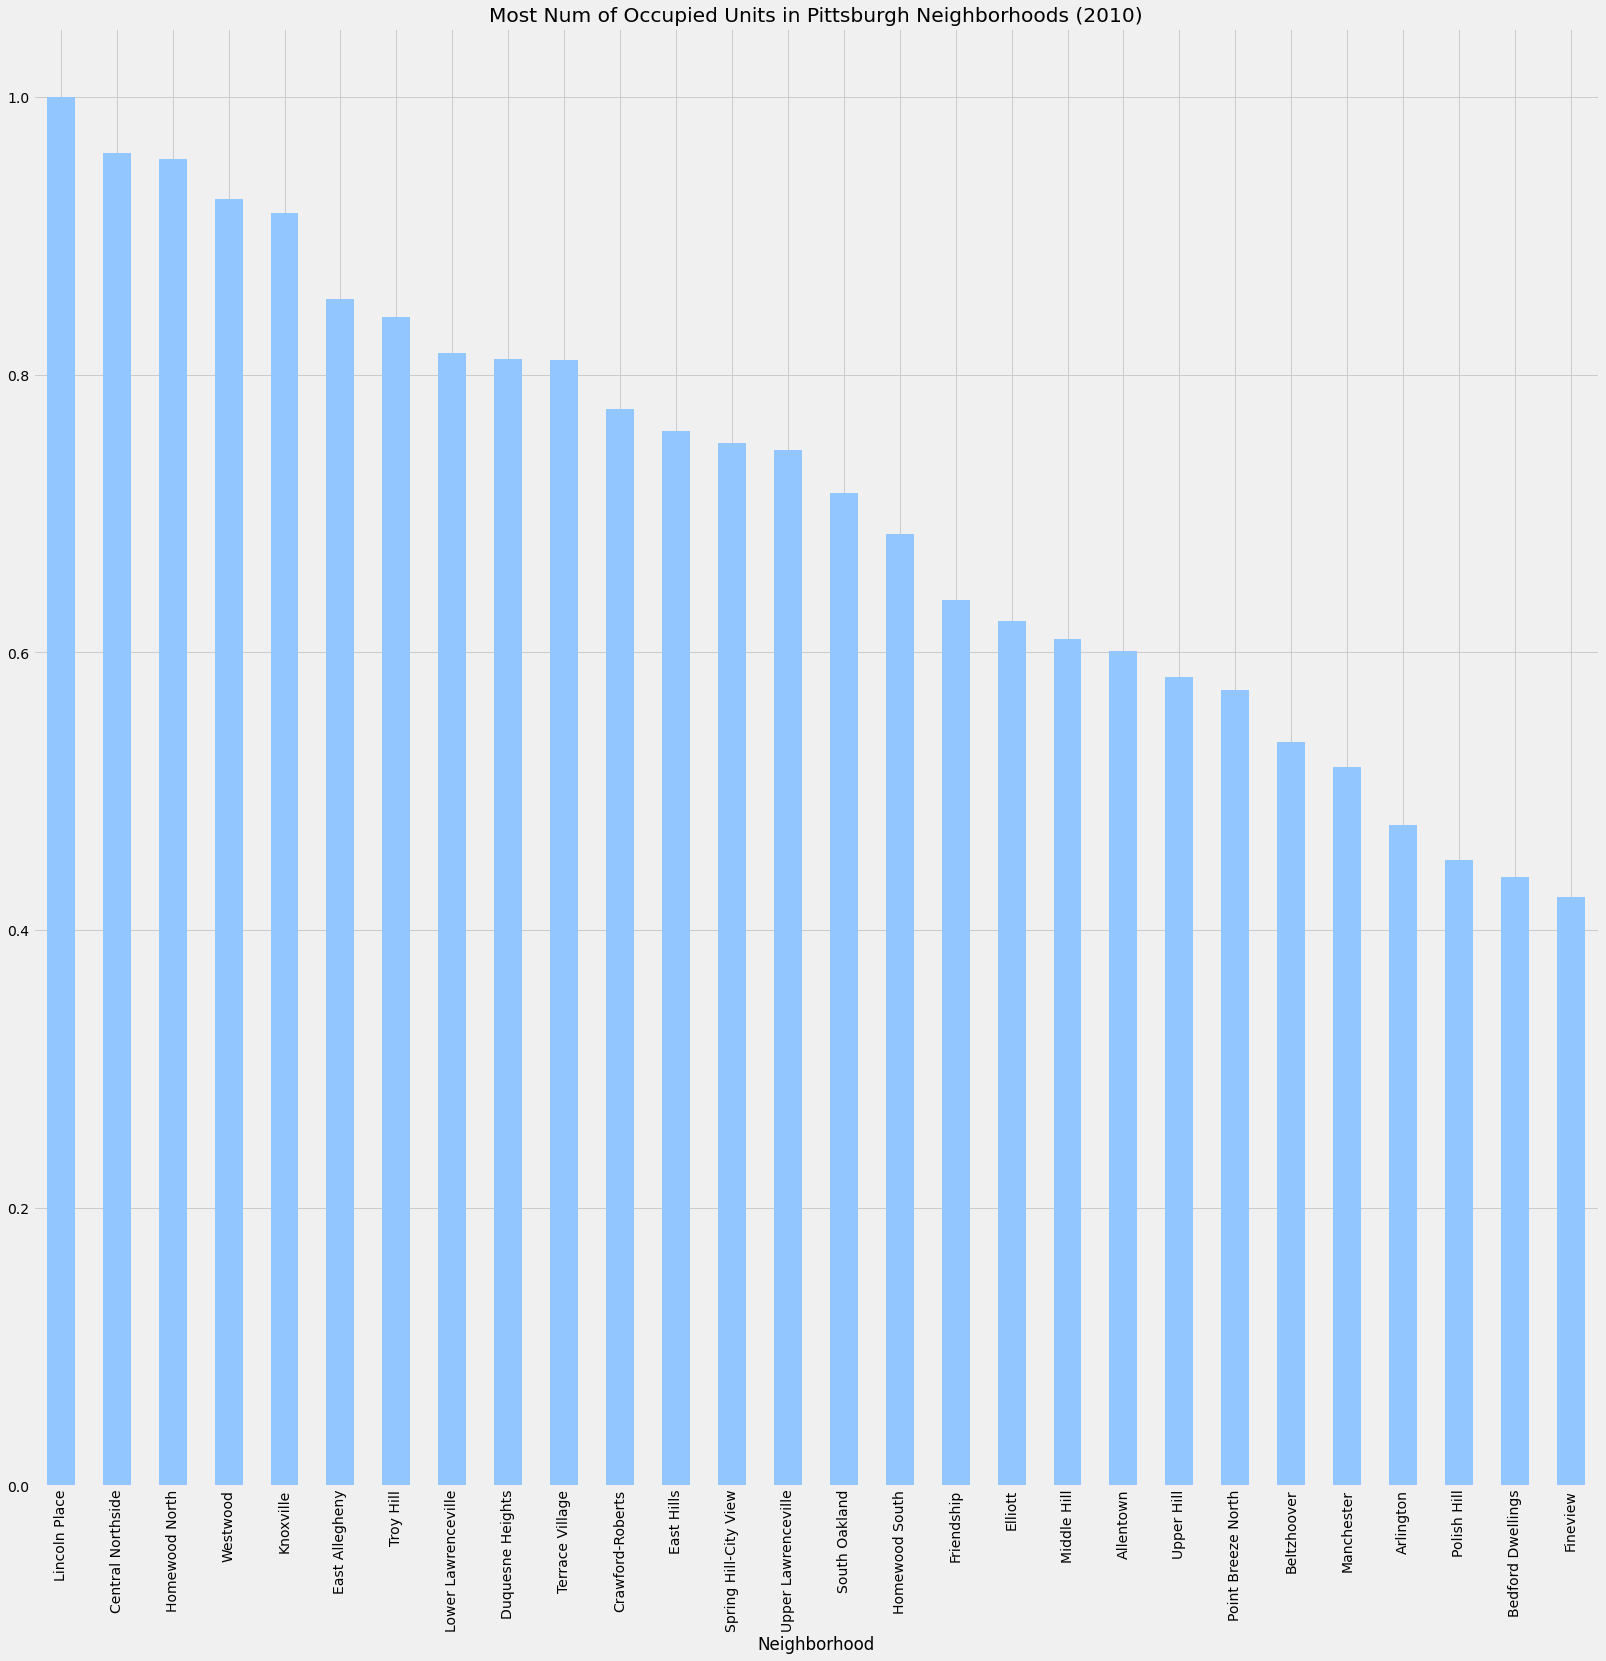

In [36]:
plt.style.use('seaborn-pastel')
rank.plot(kind='bar', x='Neighborhood', 
                    y='# Occupied Units (2010)', 
                    title='Most Num of Occupied Units in Pittsburgh Neighborhoods (2010)',
                    figsize=(25,25))

Based off this data, it can be concluded that **Lincoln Place** is the most dog friendly neighborhood according to housing and **Fineview** would be the least. 